In [1]:
%matplotlib inline

In [ ]:
# This notebook reads the results from the trend analysis and summarizes the results by plotting a heatmap (Figure 9 in the manuscript)
# Results tables are also exported for the manuscript supplement.

In [2]:
import pandas as pd
import pandas as pds
from pathlib import Path
import geopandas as gpds
import numpy as np
savepath = Path(r"C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\paper\Figures_Final")

In [3]:
# Define which gauges to skip
gauges_to_skip_1992_annual = [13,33] # Elliðaár, Hrafnkela
gauges_to_skip_1992_seasonal = [7,13,102,33] # Blanda, Elliðaár, Þjórsá krókur (human influenced)
gauges_to_skip_1972_annual = [13] # Elliðaár
gauges_to_skip_1972_seasonal = [7,13,102] # Blanda, Elliðaár, Þjórsá Krókur (human influenced)

In [16]:
import pandas as pd
import geopandas as gpds
from pathlib import Path

# Read the results datasets
results_1992 = pd.read_csv('results_1993_2023.csv', sep=';')
results_1992_2021 = results_1992.set_index('Unnamed: 0')
results_1992_2021.index = results_1992_2021.index.rename('id')
results_1992_2021['id'] = results_1992_2021.index

# Select relevant columns from results_1992_2021
results_1992_2021_selected = results_1992_2021[['annual_trend_ts', 'pval_mod',
                                                'trend_JJA_ts', 'pval_JJA_mod',
                                                'trend_SON_ts', 'pval_SON_mod',
                                                'trend_DJF_ts', 'pval_DJF_mod',
                                                'trend_MAM_ts', 'pval_MAM_mod',
                                                'trend_JAS_ts', 'pval_JAS_mod']]
results_1972 = pd.read_csv('results_1973_2023.csv', sep=';')
results_1972_2021 = results_1972.set_index('Unnamed: 0')
results_1972_2021.index = results_1972_2021.index.rename('id')

# Select relevant columns from results_1972_2021
results_1972_2021_selected = results_1972_2021[['annual_trend_ts', 'pval_mod',
                                                'trend_JJA_ts', 'pval_JJA_mod',
                                                'trend_SON_ts', 'pval_SON_mod',
                                                'trend_DJF_ts', 'pval_DJF_mod',
                                                'trend_MAM_ts', 'pval_MAM_mod',
                                                'trend_JAS_ts', 'pval_JAS_mod']]

# Read gauge attributes CSV
gauge_attrs_path = Path(r"C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\D_gauges\1_attributes\Gauge_attributes.csv")
gauge_attrs = pd.read_csv(gauge_attrs_path, sep=';')
gauge_attributes = gauge_attrs.set_index('id')

# Select relevant columns from gauge_attributes
gauge_attributes_selected = gauge_attributes[['river', 'name', 'degimpact', 'obsbeg_day', 'obsend_day']]

# Read catchment attributes file
catchment_attrs_path = Path(r"C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\A_basins_total_upstrm\1_attributes\Catchment_and_gauge_attributes_used_for_plotting.gpkg")
catchment_attrs = gpds.read_file(catchment_attrs_path)
catchment_attrs = catchment_attrs.set_index('id')
catchment_attrs_selected = catchment_attrs[['g_frac', 'baseflow_index_ladson']]

# Merge the gauge attributes with the results DataFrame first
merged_df_1992_step1 = pd.merge(gauge_attributes_selected, 
                                results_1992_2021_selected,
                                left_on='id', 
                                right_on='id')

# Merge the result with the catchment attributes DataFrame
merged_df_1992 = pd.merge(merged_df_1992_step1, 
                          catchment_attrs_selected,
                          left_on='id', 
                          right_on='id')

# First, merge the gauge attributes with the results DataFrame for 1972-2021
merged_df_1972_step1 = pd.merge(gauge_attributes_selected, 
                                results_1972_2021_selected,
                                left_on='id', 
                                right_on='id')

# Then, merge the result with the catchment attributes DataFrame
merged_df_1972 = pd.merge(merged_df_1972_step1, 
                          catchment_attrs_selected,
                          left_on='id', 
                          right_on='id')

# Update the selected columns to include the new trend and p-value columns
df_1992_output = merged_df_1992[['river', 'name', 'degimpact', 'g_frac', 'baseflow_index_ladson', 
                                       'obsbeg_day', 'obsend_day', 
                                       'annual_trend_ts', 'pval_mod',
                                       'trend_JJA_ts', 'pval_JJA_mod',
                                       'trend_JAS_ts', 'pval_JAS_mod',
                                       'trend_SON_ts', 'pval_SON_mod',
                                       'trend_DJF_ts', 'pval_DJF_mod',
                                       'trend_MAM_ts', 'pval_MAM_mod']].round(2)

df_1972_output = merged_df_1972[['river', 'name', 'degimpact', 'g_frac', 'baseflow_index_ladson', 
                                       'obsbeg_day', 'obsend_day', 
                                       'annual_trend_ts', 'pval_mod',
                                       'trend_JJA_ts', 'pval_JJA_mod',
                                       'trend_JAS_ts', 'pval_JAS_mod',
                                       'trend_SON_ts', 'pval_SON_mod',
                                       'trend_DJF_ts', 'pval_DJF_mod',
                                       'trend_MAM_ts', 'pval_MAM_mod']].round(2)

# Display the updated DataFrames
df_1992_output.head()  # Replace .head() with .to_csv() if you need to save to file
df_1972_output.head()

# Replace annual_trend_ts and pval_mod with NaN for 1992-2021 for the gauges to skip
df_1992_output.loc[df_1992_output.index.isin(gauges_to_skip_1992_annual), ['annual_trend_ts', 'pval_mod']] = np.nan

# Replace trend_DJF with NaN for 1992-2021
df_1992_output.loc[df_1992_output.index.isin(gauges_to_skip_1992_seasonal), ['trend_DJF_ts','trend_MAM_ts','trend_JJA_ts','trend_SON_ts']] = np.nan

# Replace annual_trend_ts and pval_mod with NaN for 1972-2021
df_1972_output.loc[df_1972_output.index.isin(gauges_to_skip_1972_annual), ['annual_trend_ts', 'pval_mod']] = np.nan

# Replace trend_DJF with NaN for 1972-2021
df_1972_output.loc[df_1972_output.index.isin(gauges_to_skip_1972_seasonal), ['trend_DJF_ts','trend_MAM_ts','trend_JJA_ts','trend_SON_ts']] = np.nan

# List of columns to check for all NaN values
columns_to_check = ['annual_trend_ts', 'pval_mod', 'trend_DJF_ts', 'trend_MAM_ts', 'trend_JJA_ts', 'trend_SON_ts']

# Drop rows where all values in the specified columns are NaN for 1992-2021
df_1992_output = df_1992_output.dropna(subset=columns_to_check, how='all')

# Drop rows where all values in the specified columns are NaN for 1972-2021
df_1972_output = df_1972_output.dropna(subset=columns_to_check, how='all')

In [17]:
# Function to calculate trend statistics
def trend_stats(df, column_trend, column_pval, label):
    # Total number of non-NaN cases
    total_cases = df[column_trend].notna().sum()
    # Positive trends
    positive_cases = (df[column_trend].dropna() > 0).sum()
    positive_significant = ((df[column_trend].dropna() > 0) & (df[column_pval].dropna() < 0.05)).sum()
    # Negative trends
    negative_cases = (df[column_trend] < 0).sum()
    negative_significant = ((df[column_trend].dropna() < 0) & (df[column_pval].dropna() < 0.05)).sum()
    
    # Print results
    print(f"{label} trends are positive in {positive_cases} cases out of {total_cases}, "
          f"thereof {positive_significant} are significant.")
    print(f"{label} trends are negative in {negative_cases} cases out of {total_cases}, "
          f"thereof {negative_significant} are significant.")
    print()

# List of columns and labels to calculate stats for
columns = [
    ("annual_trend_ts", "pval_mod", "Annual"),
    ("trend_JJA_ts", "pval_JJA_mod", "Seasonal JJA"),
    ("trend_JAS_ts", "pval_JAS_mod", "Seasonal JAS"),
    ("trend_SON_ts", "pval_SON_mod", "Seasonal SON"),
    ("trend_DJF_ts", "pval_DJF_mod", "Seasonal DJF"),
    ("trend_MAM_ts", "pval_MAM_mod", "Seasonal MAM")
]

# Loop through the list and calculate statistics for each column pair
for trend_col, pval_col, label in columns:
    trend_stats(df_1972_output, trend_col, pval_col, label)


Annual trends are positive in 21 cases out of 25, thereof 8 are significant.
Annual trends are negative in 4 cases out of 25, thereof 0 are significant.

Seasonal JJA trends are positive in 10 cases out of 28, thereof 3 are significant.
Seasonal JJA trends are negative in 18 cases out of 28, thereof 5 are significant.

Seasonal JAS trends are positive in 18 cases out of 30, thereof 6 are significant.
Seasonal JAS trends are negative in 12 cases out of 30, thereof 2 are significant.

Seasonal SON trends are positive in 23 cases out of 26, thereof 18 are significant.
Seasonal SON trends are negative in 2 cases out of 26, thereof 1 are significant.

Seasonal DJF trends are positive in 22 cases out of 23, thereof 12 are significant.
Seasonal DJF trends are negative in 1 cases out of 23, thereof 0 are significant.

Seasonal MAM trends are positive in 20 cases out of 25, thereof 7 are significant.
Seasonal MAM trends are negative in 5 cases out of 25, thereof 1 are significant.



In [18]:
# Loop through the list and calculate statistics for each column pair
for trend_col, pval_col, label in columns:
    trend_stats(df_1992_output, trend_col, pval_col, label)

Annual trends are positive in 28 cases out of 37, thereof 5 are significant.
Annual trends are negative in 9 cases out of 37, thereof 0 are significant.

Seasonal JJA trends are positive in 15 cases out of 36, thereof 4 are significant.
Seasonal JJA trends are negative in 21 cases out of 36, thereof 1 are significant.

Seasonal JAS trends are positive in 13 cases out of 38, thereof 2 are significant.
Seasonal JAS trends are negative in 25 cases out of 38, thereof 2 are significant.

Seasonal SON trends are positive in 29 cases out of 35, thereof 7 are significant.
Seasonal SON trends are negative in 6 cases out of 35, thereof 0 are significant.

Seasonal DJF trends are positive in 22 cases out of 35, thereof 2 are significant.
Seasonal DJF trends are negative in 13 cases out of 35, thereof 1 are significant.

Seasonal MAM trends are positive in 30 cases out of 35, thereof 8 are significant.
Seasonal MAM trends are negative in 5 cases out of 35, thereof 0 are significant.



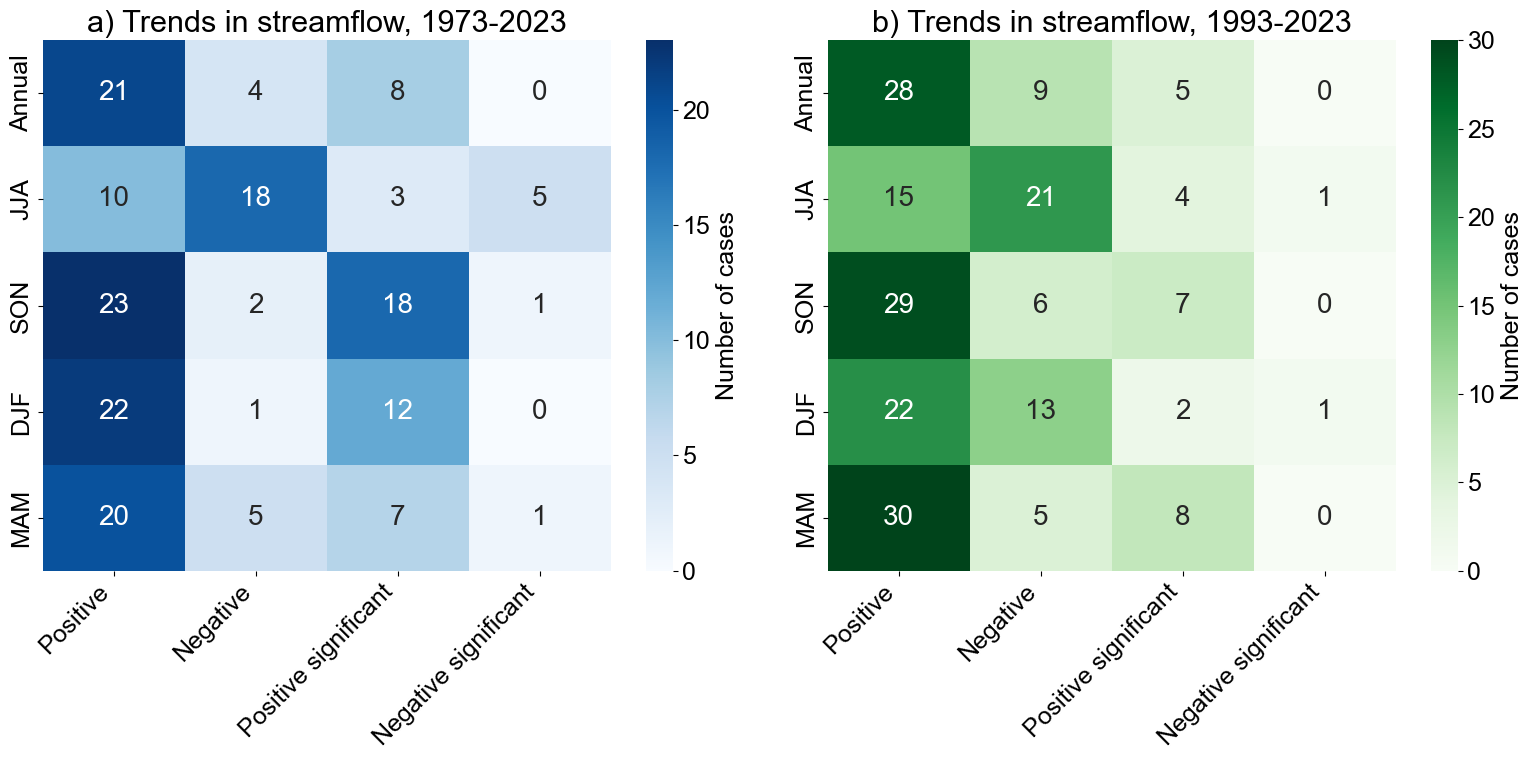

In [23]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os

# Ensure fonts are Arial and increase font sizes
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 20
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 18
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18

# Function to calculate trend statistics and prepare heatmap data
def generate_heatmap_data(df, columns):
    heatmap_data = {'Positive': [], 'Negative': [], 'Positive significant': [], 'Negative significant': []}
    for trend_col, pval_col, label in columns:
        total_cases = df[trend_col].notna().sum()
        positive_cases = (df[trend_col].dropna() > 0).sum()
        positive_significant = ((df[trend_col].dropna() > 0) & (df[pval_col].dropna() < 0.05)).sum()
        negative_cases = (df[trend_col].dropna() < 0).sum()
        negative_significant = ((df[trend_col].dropna() < 0) & (df[pval_col].dropna() < 0.05)).sum()

        heatmap_data['Positive'].append(positive_cases)
        heatmap_data['Negative'].append(negative_cases)
        heatmap_data['Positive significant'].append(positive_significant)
        heatmap_data['Negative significant'].append(negative_significant)
    return pd.DataFrame(heatmap_data, index=['Annual', 'JJA', 'SON', 'DJF', 'MAM'])

# Define periods and dataframes (replace these with your actual dataframes)
period1_df = df_1972_output #results_1972_2021  # Replace with your dataframe for 1973-2023
period2_df = df_1992_output #results_1992_2021  # Replace with your dataframe for 1993-2023

# Define columns for trend statistics
columns = [
    ("annual_trend_ts", "pval_mod", "Annual"),
    ("trend_JJA_ts", "pval_JJA_mod", "Seasonal JJA"),
    ("trend_SON_ts", "pval_SON_mod", "Seasonal SON"),
    ("trend_DJF_ts", "pval_DJF_mod", "Seasonal DJF"),
    ("trend_MAM_ts", "pval_MAM_mod", "Seasonal MAM")
]

# Generate heatmap data
df_1972 = generate_heatmap_data(period1_df, columns)
df_1993 = generate_heatmap_data(period2_df, columns)

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(df_1972, annot=True, cmap='Blues', ax=axes[0], cbar_kws={'label': 'Number of cases'})
axes[0].set_title('a) Trends in streamflow, 1973-2023', fontsize=22)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.heatmap(df_1993, annot=True, cmap='Greens', ax=axes[1], cbar_kws={'label': 'Number of cases'})
axes[1].set_title('b) Trends in streamflow, 1993-2023', fontsize=22)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
# plt.savefig(os.path.join(savepath,'trends_summary_heatmap.png'),dpi=300)
# plt.savefig(os.path.join(savepath,'trends_summary_heatmap.pdf'),dpi=300)

plt.show()



In [24]:
# List of columns and labels to calculate stats for
columns = [
    ("annual_trend_ts", "pval_mod", "Annual"),
    ("trend_JJA_ts", "pval_JJA_mod", "Seasonal JJA"),
    ("trend_JAS_ts", "pval_JAS_mod", "Seasonal JAS"),
    ("trend_SON_ts", "pval_SON_mod", "Seasonal SON"),
    ("trend_DJF_ts", "pval_DJF_mod", "Seasonal DJF"),
    ("trend_MAM_ts", "pval_MAM_mod", "Seasonal MAM")
]

# Add number of glacierized catchments in parentheses

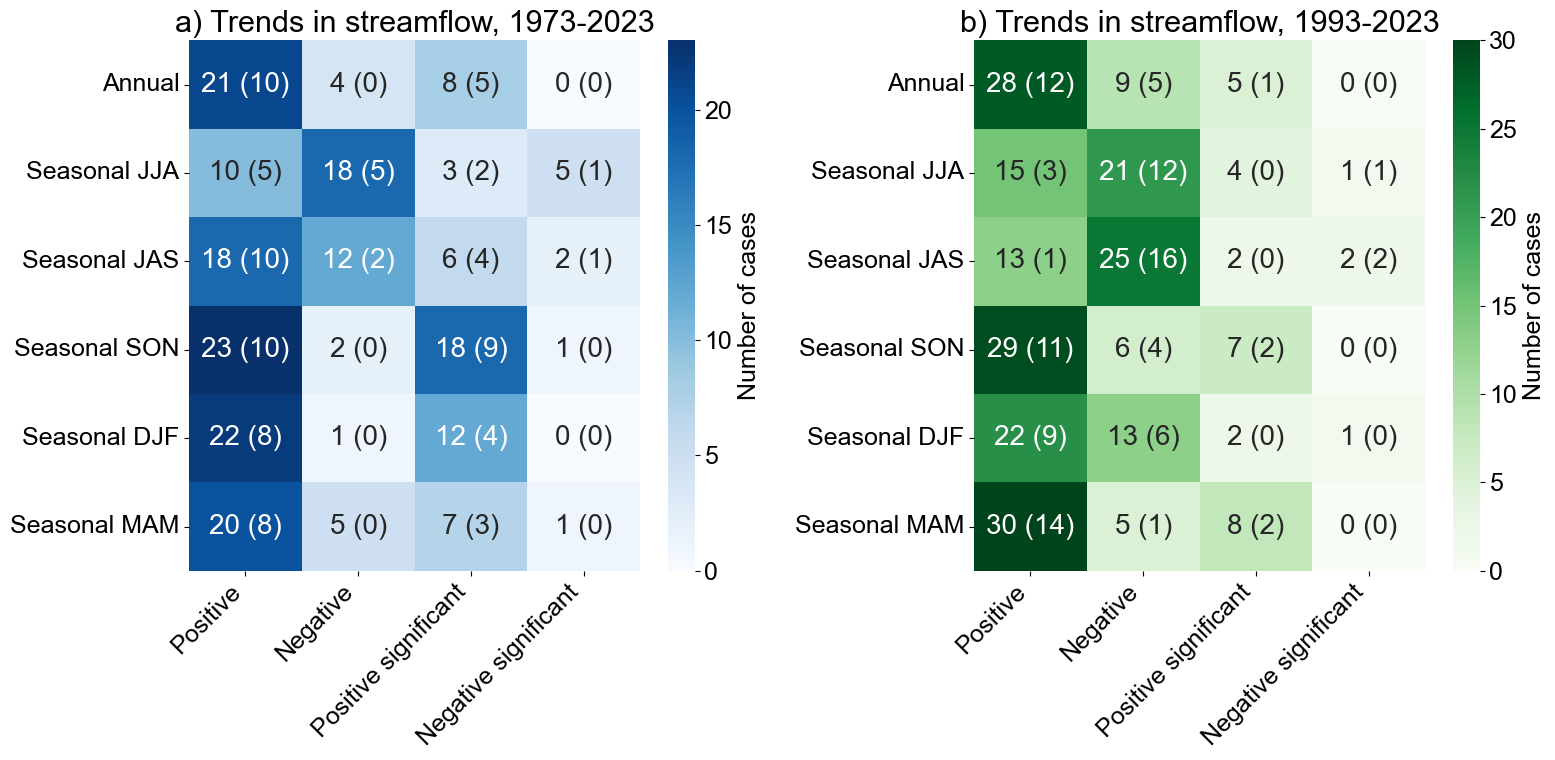

In [28]:
# Function to calculate trend statistics and prepare heatmap data with glaciated basin counts
def generate_heatmap_data_with_glaciation(df, columns, glaciation_threshold=0.05):
    heatmap_data = {'Positive': [], 'Negative': [], 'Positive significant': [], 'Negative significant': []}
    annotations = {'Positive': [], 'Negative': [], 'Positive significant': [], 'Negative significant': []}

    for trend_col, pval_col, label in columns:
        total_cases = df[trend_col].notna().sum()

        # General counts
        positive_cases = (df[trend_col].dropna() > 0).sum()
        negative_cases = (df[trend_col].dropna() < 0).sum()
        positive_significant = ((df[trend_col].dropna() > 0) & (df[pval_col].dropna() < 0.05)).sum()
        negative_significant = ((df[trend_col].dropna() < 0) & (df[pval_col].dropna() < 0.05)).sum()

        # Glaciated basin counts
        positive_glaciated = ((df[trend_col] > 0) & (df['g_frac'] > glaciation_threshold)).sum()
        negative_glaciated = ((df[trend_col] < 0) & (df['g_frac'] > glaciation_threshold)).sum()
        positive_significant_glaciated = ((df[trend_col] > 0) & (df[pval_col] < 0.05) & (df['g_frac'] > glaciation_threshold)).sum()
        negative_significant_glaciated = ((df[trend_col] < 0) & (df[pval_col] < 0.05) & (df['g_frac'] > glaciation_threshold)).sum()

        # Append general counts
        heatmap_data['Positive'].append(positive_cases)
        heatmap_data['Negative'].append(negative_cases)
        heatmap_data['Positive significant'].append(positive_significant)
        heatmap_data['Negative significant'].append(negative_significant)

        # Append annotations with glaciated basin counts
        annotations['Positive'].append(f"{positive_cases} ({positive_glaciated})")
        annotations['Negative'].append(f"{negative_cases} ({negative_glaciated})")
        annotations['Positive significant'].append(f"{positive_significant} ({positive_significant_glaciated})")
        annotations['Negative significant'].append(f"{negative_significant} ({negative_significant_glaciated})")

    # Use dynamic index based on column labels
    index_labels = [label for _, _, label in columns]
    return pd.DataFrame(heatmap_data, index=index_labels), pd.DataFrame(annotations, index=index_labels)


# Generate heatmap data and annotations
df_1972, annotations_1972 = generate_heatmap_data_with_glaciation(df_1972_output, columns)
df_1993, annotations_1993 = generate_heatmap_data_with_glaciation(df_1992_output, columns)

# Plot heatmaps with annotations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.heatmap(df_1972, annot=annotations_1972, fmt='', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Number of cases'})
axes[0].set_title('a) Trends in streamflow, 1973-2023', fontsize=22)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.heatmap(df_1993, annot=annotations_1993, fmt='', cmap='Greens', ax=axes[1], cbar_kws={'label': 'Number of cases'})
axes[1].set_title('b) Trends in streamflow, 1993-2023', fontsize=22)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig(os.path.join(savepath,'trends_summary_heatmap_with_glaciation.png'),dpi=300)
plt.savefig(os.path.join(savepath,'trends_summary_heatmap_with_glaciation.pdf'),dpi=300)

plt.show()

In [32]:
# Dictionary to map old column names to new column names
column_rename_mapping = {
    'degimpact': 'impact',
    'baseflow_index_ladson': 'BFI',
    'obsbeg_day': 'obsbeg',
    'obsend_day': 'obsend',
    'annual_trend_ts': 'annual_trend',
    'pval_mod': 'annual_pval',
    'trend_DJF_ts': 'trend_DJF',
    'trend_MAM_ts': 'trend_MAM',
    'trend_JJA_ts': 'trend_JJA',
    'trend_JAS_ts': 'trend_JAS',
    'trend_SON_ts': 'trend_SON'
    # The rest of the column names remain unchanged, so they don't need to be in the dictionary
}

# Rename the columns for both 1992-2021 and 1972-2021 datasets
df_1992_output = df_1992_output.rename(columns=column_rename_mapping)
df_1972_output = df_1972_output.rename(columns=column_rename_mapping)

In [76]:
# Save the DataFrames to Excel files
df_1992_output.to_excel('df_1993_output.xlsx', index=True)
df_1972_output.to_excel('df_1973_output.xlsx', index=True)

# Save three tables for the appendix - One lookup table and two results tables

In [79]:
import pandas as pd

def create_tables(df_1972, df_1992):
    df_1992['id'] = df_1992.index
    df_1972['id'] = df_1972.index
    # Common columns for the tables
    common_columns = ['id', 'river', 'name', 'impact', 'g_frac', 'BFI', 'obsbeg', 'obsend']
    
    # Identify common rivers across both datasets to avoid duplicates
    common_ids = set(df_1972['id']).intersection(df_1992['id'])

    # Table 1: Basic attributes without duplicates
    table_1 = pd.concat([df_1972[common_columns], df_1992[common_columns]])
    table_1['g_frac']=100*table_1['g_frac']
    table_1 = table_1.drop_duplicates(subset='id').reset_index(drop=True)

    # Table 2: Trend parameters for 1972-2021 (select only relevant columns)
    trend_columns_1972 = ['id', 'annual_trend', 'annual_pval', 'trend_DJF', 'trend_MAM', 'trend_JJA', 'trend_SON']
    table_2 = df_1972[trend_columns_1972].drop_duplicates(subset='id').reset_index(drop=True)

    # Table 3: Trend parameters for 1992-2021 (select only relevant columns)
    trend_columns_1992 = ['id', 'annual_trend', 'annual_pval', 'trend_DJF', 'trend_MAM', 'trend_JJA', 'trend_SON']
    table_3 = df_1992[trend_columns_1992].drop_duplicates(subset='id').reset_index(drop=True)
    
    return table_1, table_2, table_3

# Using the provided DataFrames from earlier
table_1, table_2, table_3 = create_tables(df_1972_output, df_1992_output)

table_1 = table_1.set_index('id').sort_index()
table_2 = table_2.set_index('id').sort_index()
table_3 = table_3.set_index('id').sort_index()

# Display the first few rows of each table (optional)
print("Table 1 - Basic Attributes:")
print(table_1.head())

print("\nTable 2 - Trend Parameters 1972-2021:")
print(table_2.head())

print("\nTable 3 - Trend Parameters 1992-2021:")
print(table_3.head())


Table 1 - Basic Attributes:
   id            river              name impact  g_frac   BFI  obsbeg  obsend
0   3  Austari-Jökulsá   ofan Skatastaða      u     9.0  0.76    1971    2022
1   7           Blanda         Langamýri      s    10.0  0.79    1974    2023
2   8           Brúará          Dynjandi      l     0.0  0.88    2005    2021
3  11            Djúpá  neðan Djúpárdals      u    33.0  0.64    1968    2021
4  12       Dynjandisá         Sjóarfoss      l     0.0  0.63    1956    2021

Table 2 - Trend Parameters 1972-2021:
   id  annual_trend  annual_pval  trend_DJF  trend_MAM  trend_JJA  trend_SON
0   3          2.15         0.09       3.84       3.81      -1.83       7.16
1   7          0.09         0.95        NaN        NaN        NaN        NaN
2   8          2.26         0.05       2.94       1.65       0.50       3.44
3  11          4.22         0.01       3.01       4.16       2.31       9.11
4  12          1.78         0.14       8.16       7.70      -4.23       5.17

Ta

In [ ]:
# Update the start and end years in the table:

In [81]:
# Calculate new obsbeg and obsend years: 
import geopandas as gpd
# Read streamflow
save_path = Path(r"C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\data\unfiltered_meas_m3_s_without_highly_influenced_gauges_nov25_2024.csv")

df_with_data = pds.read_csv(save_path)
df_with_data = df_with_data.set_index('Unnamed: 0')
df_with_data.index = pds.to_datetime(df_with_data.index)
df_with_data = df_with_data[:'2023-09-30']

# Read gauge shapefile
gauges_path = Path(r'C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\D_gauges\3_shapefiles\gauges.shp') 
gauges = gpd.read_file(gauges_path)
gauges = gauges.set_index('id')
cols = ['V_no','name','VHM_no','river', 'elevation', 'geometry']
gauges_reduced = gauges[cols]
gauges_reduced = gauges_reduced.sort_index()

def drop_nan_boundaries(df):
    first_valid_idx = df.first_valid_index()
    last_valid_idx = df.last_valid_index()
    return df.loc[first_valid_idx:last_valid_idx]

gauge_data_nan_cleaned_daily = dict()
for key in df_with_data.columns:
    gauge_data_nan_cleaned_daily[key] = drop_nan_boundaries(df_with_data[key])

# First we process daily streamflow
indices = []
beginning_year = []
end_year = []
for idx in gauges_reduced.index:
    try:
        gauge = gauges_reduced.loc[idx]['V_no']
        if gauge in ['V100','V68','V112']:
            gauge=gauge+'_1'
        beginning_year.append(gauge_data_nan_cleaned_daily[str(idx)].index[0].year)
        end_year.append(gauge_data_nan_cleaned_daily[str(idx)].index[-1].year)
        indices.append(idx)
    except:
        print('no data for id %s' %idx)

df = pds.DataFrame({'obsbeg': beginning_year,
                   'obsend': end_year},
                  index=indices)

no data for id 1
no data for id 13
no data for id 22
no data for id 25
no data for id 35
no data for id 55
no data for id 71
no data for id 74
no data for id 75
no data for id 76
no data for id 78
no data for id 81
no data for id 85
no data for id 87
no data for id 89
no data for id 90
no data for id 97
no data for id 100
no data for id 106
no data for id 890
no data for id 1010
no data for id 9900


In [82]:
table_1['obsbeg'] = df['obsbeg']
table_1['obsend'] = df['obsend']

In [84]:
# Save the DataFrames to Excel files
table_1.to_excel('table1.xlsx', index=True)
table_2.to_excel('table2.xlsx', index=True)
table_3.to_excel('table3.xlsx', index=True)

In [85]:
# Print statistics
# For the 1972 output
max_1972 = df_1972_output['annual_trend'].max()
min_1972 = df_1972_output['annual_trend'].min()
print(f"1972-2021 Period - Max Annual Trend: {max_1972}")
print(f"1972-2021 Period - Min Annual Trend: {min_1972}")

# For the 1992 output
max_1992 = df_1992_output['annual_trend'].max()
min_1992 = df_1992_output['annual_trend'].min()
print(f"1992-2021 Period - Max Annual Trend: {max_1992}")
print(f"1992-2021 Period - Min Annual Trend: {min_1992}")


1972-2021 Period - Max Annual Trend: 6.06
1972-2021 Period - Min Annual Trend: -3.98
1992-2021 Period - Max Annual Trend: 9.94
1992-2021 Period - Min Annual Trend: -6.26


In [86]:
# For the 1972 output
columns = ['trend_DJF', 'trend_MAM', 'trend_JJA', 'trend_SON']
min_1972 = df_1972_output[columns].min().min()  # Find the overall minimum
max_1972 = df_1972_output[columns].max().max()  # Find the overall maximum
print(f"1972-2021 Period - Overall Min Trend: {min_1972}")
print(f"1972-2021 Period - Overall Max Trend: {max_1972}")

# For the 1992 output
min_1992 = df_1992_output[columns].min().min()  # Find the overall minimum
max_1992 = df_1992_output[columns].max().max()  # Find the overall maximum
print(f"1992-2021 Period - Overall Min Trend: {min_1992}")
print(f"1992-2021 Period - Overall Max Trend: {max_1992}")


1972-2021 Period - Overall Min Trend: -13.4
1972-2021 Period - Overall Max Trend: 14.2
1992-2021 Period - Overall Min Trend: -18.12
1992-2021 Period - Overall Max Trend: 26.48
